# Churn_ModellingData_DL :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# to import basic libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Deep Learning notebook/Churn_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


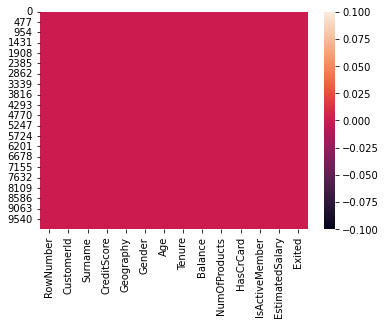

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

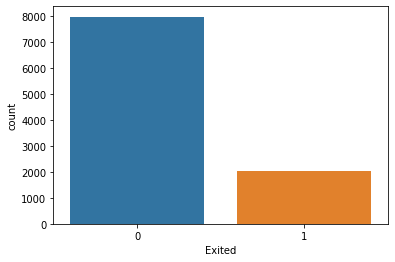

In [ ]:
sns.countplot(data = df, x = "Exited")

In [ ]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Observation : Their are no null values, and all the data-types are of numerical type and object type. And data is not balanced as well, need to overcome it.

## Handling the object type data and removing the unwanted columns :

In [ ]:
df.drop(["RowNumber","Surname","CustomerId"], axis = 1, inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# to use LabelEncoder :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Gender"] = le.fit_transform(df[["Gender"]])
df["Geography"] = le.fit_transform(df["Geography"])

# To overcome data unbalancing :

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state = 1)

In [ ]:
# to select the input and output :
x = df.drop("Exited", axis = 1)
y = df["Exited"]

In [ ]:
# to train test split :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
# to apply RandomOverSampler :

x_train1, y_train1 = ros.fit_resample(x_train, y_train)
x_test1, y_test1 = ros.fit_resample(x_test, y_test)

In [ ]:
y_train1.value_counts()

0    5590
1    5590
Name: Exited, dtype: int64

In [ ]:
y_test1.value_counts()

0    2373
1    2373
Name: Exited, dtype: int64

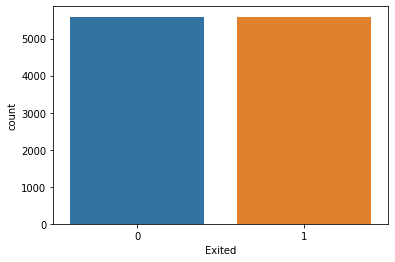

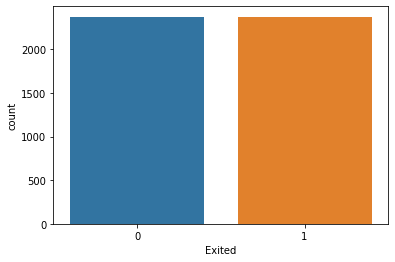

In [ ]:
sns.countplot(y_train1)
plt.show()
sns.countplot(y_test1)
plt.show()

Observation : The data is now balanced, we can now further proceed with Model Training. 

# To apply StandardScaler :

In [ ]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [ ]:
x_train

array([[-0.06042858, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834, -1.37686713],
       [-1.74363086, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735, -1.31233857],
       [ 0.31132161, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834, -0.31884349],
       ...,
       [ 0.22871046, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735, -0.14048457],
       [ 0.13577291, -0.90542304, -1.08628092, ...,  0.64198477,
         0.98131735,  0.01856724],
       [ 1.16841234,  0.30503557,  0.92057219, ...,  0.64198477,
        -1.01903834, -1.15947765]])

In [ ]:
x_test

array([[-1.03110965, -0.90542304,  0.92057219, ...,  0.64198477,
         0.98131735, -0.05297259],
       [ 0.31132161, -0.90542304,  0.92057219, ...,  0.64198477,
        -1.01903834, -0.58419919],
       [-1.22731114, -0.90542304, -1.08628092, ..., -1.55766936,
         0.98131735, -0.16641355],
       ...,
       [-0.05010219, -0.90542304,  0.92057219, ...,  0.64198477,
        -1.01903834, -0.99929104],
       [-0.38054681, -0.90542304, -1.08628092, ...,  0.64198477,
        -1.01903834,  1.72259088],
       [ 0.17707849,  1.51549418, -1.08628092, ...,  0.64198477,
         0.98131735,  1.50922501]])

# To create a Neural Network :

In [ ]:
import tensorflow as tf
from keras.layers import Dropout

In [ ]:
# creating a neural network :
model = tf.keras.models.Sequential([
                                    
        tf.keras.layers.Dense(units = 32, activation = "relu", input_shape = (x.shape[1],)),
        tf.keras.layers.Dense(units = 16, activation = "relu"), Dropout(0.25),
        tf.keras.layers.Dense(units = 8, activation = "relu"), Dropout(0.25),
        tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])

In [ ]:
# to show summary :
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainabl

In [ ]:
# to compile the model :
model.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# to use early stopping :
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
callback = EarlyStopping(
           monitor = "val_loss",
           min_delta = 0.00001,
           patience = 20,
           verbose = 1,
           mode = "auto",
           baseline=None,
           restore_best_weights=False
)

Performing the modelling first with Unbalanced data :

In [ ]:
# to train the model :
trained_model = model.fit(x_train, y_train, epochs = 1000,batch_size = 50, validation_data = (x_test, y_test), verbose = 1, callbacks = callback)
# validation_data = (x_test, y_test) or validation_split = 0.2

Epoch 1/1000
140/140 [==============================] - 4s 11ms/step - loss: 0.5278 - accuracy: 0.7894 - val_loss: 0.4641 - val_accuracy: 0.7910
Epoch 2/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.4652 - accuracy: 0.8001 - val_loss: 0.4370 - val_accuracy: 0.7950
Epoch 3/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.4465 - accuracy: 0.8049 - val_loss: 0.4236 - val_accuracy: 0.8053
Epoch 4/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.4244 - accuracy: 0.8114 - val_loss: 0.4062 - val_accuracy: 0.8063
Epoch 5/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.4170 - accuracy: 0.8153 - val_loss: 0.3930 - val_accuracy: 0.8203
Epoch 6/1000
140/140 [==============================] - 1s 5ms/step - loss: 0.4056 - accuracy: 0.8231 - val_loss: 0.3817 - val_accuracy: 0.8387
Epoch 7/1000
140/140 [==============================] - 1s 7ms/step - loss: 0.4015 - accuracy: 0.8276 - val_loss: 0.3770 - val_accuracy

In [ ]:
# to evaluate the model :
print("Training loss and Accuracy = ", model.evaluate(x_train, y_train))
print("Testing loss and Accurcay = ", model.evaluate(x_test, y_test))

219/219 [==============================] - 1s 2ms/step - loss: 0.3131 - accuracy: 0.8729
Training loss and Accuracy =  [0.3131275177001953, 0.8728571534156799]
94/94 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8560
Testing loss and Accurcay =  [0.34693288803100586, 0.8560000061988831]


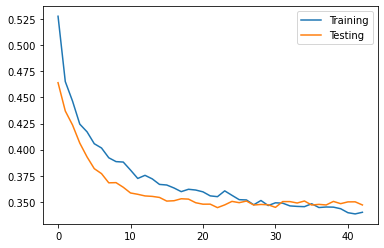

In [ ]:
# visulaize :
plt.plot(trained_model.history["loss"], label = "Training")
plt.plot(trained_model.history["val_loss"], label = "Testing")
plt.legend()


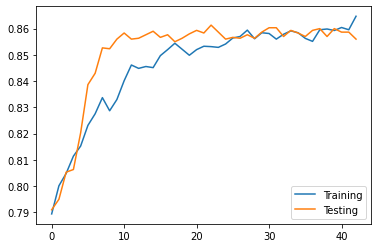

In [ ]:
# visulaize :
plt.plot(trained_model.history["accuracy"], label = "Training")
plt.plot(trained_model.history["val_accuracy"], label = "Testing")
plt.legend()


In [ ]:
# To predict the output :
y_predict = model.predict(x_test)
y_predict = np.where(y_predict >= 0.5, 1,0)
y_predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
dict = {"Actual_output":y_test} # 1D array output.
dict = pd.DataFrame(dict)

# to add y_predict column :
dict["Predicted_output"] = y_predict # 2D array output.
print(dict)

      Actual_output  Predicted_output
9953              0                 0
3850              0                 0
4962              0                 0
3886              0                 0
5437              0                 0
...             ...               ...
5273              0                 0
8014              0                 0
8984              0                 0
6498              0                 0
6327              0                 0

[3000 rows x 2 columns]


In [ ]:
# to print the Classification report and Confusion matrix :
from sklearn.metrics import classification_report, confusion_matrix

print("Classification_Report = ")
print(classification_report(y_test, y_predict))
print("Confusion_Matrix = ")
print(confusion_matrix(y_test, y_predict))

Classification_Report = 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.46      0.57       627

    accuracy                           0.86      3000
   macro avg       0.81      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000

Confusion_Matrix = 
[[2278   95]
 [ 337  290]]


Observation : From the Above model performing, it is observed that without balancing the data, we have gained the accuracy, but the minority records were neglected by the training model, and model is not fit to perform.

Now performing with Balanced Data :

In [ ]:
# to train the model :
trained_model1 = model.fit(x_train1, y_train1, epochs = 1000, batch_size = 50, validation_data = (x_test1, y_test1),
                           verbose = 1, callbacks = callback)
# validation_data = (x_test, y_test) or validation_split = 0.2

Epoch 1/1000
224/224 [==============================] - 1s 4ms/step - loss: 454.4572 - accuracy: 0.4996 - val_loss: 0.7305 - val_accuracy: 0.5000
Epoch 2/1000
224/224 [==============================] - 1s 3ms/step - loss: 19.0989 - accuracy: 0.5157 - val_loss: 2.6402 - val_accuracy: 0.5579
Epoch 3/1000
224/224 [==============================] - 1s 3ms/step - loss: 4.5499 - accuracy: 0.5059 - val_loss: 0.9535 - val_accuracy: 0.4941
Epoch 4/1000
224/224 [==============================] - 1s 3ms/step - loss: 2.7421 - accuracy: 0.4957 - val_loss: 0.7058 - val_accuracy: 0.4994
Epoch 5/1000
224/224 [==============================] - 1s 4ms/step - loss: 0.7001 - accuracy: 0.5023 - val_loss: 0.6938 - val_accuracy: 0.4994
Epoch 6/1000
224/224 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 7/1000
224/224 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5054 - val_loss: 0.6937 - val_accura

In [ ]:
# to evaluate the model :
# to evaluate the model :
print("Training loss and Accuracy = ", model.evaluate(x_train1, y_train1))
print("Testing loss and Accurcay = ", model.evaluate(x_test1, y_test1))

350/350 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5004
Training loss and Accuracy =  [0.6922816038131714, 0.5004472136497498]
149/149 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5004
Testing loss and Accurcay =  [0.6924166679382324, 0.500421404838562]


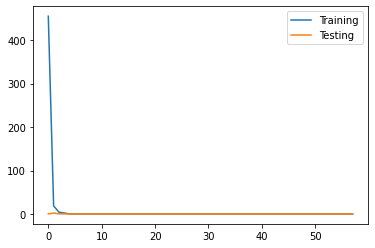

In [ ]:
# visulaize :
plt.plot(trained_model1.history["loss"], label = "Training")
plt.plot(trained_model1.history["val_loss"], label = "Testing")
plt.legend()


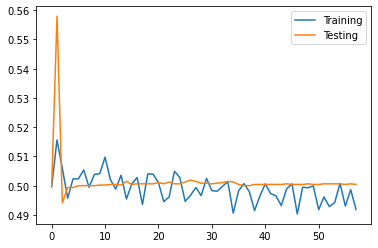

In [ ]:
# visulaize :
plt.plot(trained_model1.history["accuracy"], label = "Training")
plt.plot(trained_model1.history["val_accuracy"], label = "Testing")
plt.legend()


In [ ]:
# To predict the output :
y_predict1 = model.predict(x_test1)
y_predict1 = np.where(y_predict1 >= 0.5, 1,0)
y_predict1

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
dict = {"Actual_output":y_test1} # 1D array output.
dict = pd.DataFrame(dict)

# to add y_predict column :
dict["Predicted_output"] = y_predict1 # 2D array output.
print(dict)

      Actual_output  Predicted_output
0                 0                 1
1                 0                 1
2                 0                 1
3                 0                 1
4                 0                 1
...             ...               ...
4741              1                 1
4742              1                 1
4743              1                 1
4744              1                 1
4745              1                 1

[4746 rows x 2 columns]


In [ ]:
# to print the Classification report and Confusion matrix :
print("Classification_report")
print(classification_report(y_test1,y_predict1))
print("Confusion_Matrix")
print(confusion_matrix(y_test1,y_predict1))

Classification_report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2373
           1       0.50      1.00      0.67      2373

    accuracy                           0.50      4746
   macro avg       0.75      0.50      0.33      4746
weighted avg       0.75      0.50      0.33      4746

Confusion_Matrix
[[   2 2371]
 [   0 2373]]


Observation : By training the model with Balanced Data, we have achieved accuracy but, the model is overfit, i.e, Training score is more than Testing score, as the model is learned too much from the Data leading to overfiting.

# To applying Regularization to reduce Overfiting :

Artificial Neural Network is always tend to be overfit due to large data, and model tries to learn through every pattern of Data.

So to reduce it we can try Regularization :

!pip install keras


In [ ]:
# to apply regularization :
from keras import regularizers
# regularizers is method of keras

In [ ]:
# creating a Neural Network using regularizers :

model1 = tf.keras.models.Sequential([
                                      
         tf.keras.layers.Dense(units = 1000, activation = "relu", input_shape = (x.shape[1],),
                               kernel_regularizer = regularizers.l1(0.01)), #Dropout(0.25),  # hidden layer 1
         tf.keras.layers.Dense(units = 1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01)), #Dropout(0.25), # hidden layer 2
         tf.keras.layers.Dense(units = 1000, activation = "relu", kernel_regularizer = regularizers.l2(0.01)), #Dropout(0.25), # hidden layer 3
         tf.keras.layers.Dense(units = 512, activation = "relu", kernel_regularizer = regularizers.l2(0.01)), #Dropout(0.25), # hidden layer 4
         tf.keras.layers.Dense(units = 1, activation = "sigmoid", kernel_regularizer = regularizers.l2(0.01)) # output layer

])
# it is the fully grown network 

In [ ]:
# to show summary :
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              11000     
                                                                 
 dense_5 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_6 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_7 (Dense)             (None, 512)               512512    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 2,526,025
Trainable params: 2,526,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# to compile the model1 :
model1.compile(optimizer = "Adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# to train the model and validate :
trained_model2 = model1.fit(x_train1, y_train1, epochs = 1000, 
                           validation_data = (x_test1, y_test1), 
                           batch_size = 50,
                           callbacks = callback)

Epoch 1/1000
224/224 [==============================] - 12s 50ms/step - loss: 298.0499 - accuracy: 0.5149 - val_loss: 21.3025 - val_accuracy: 0.5554
Epoch 2/1000
224/224 [==============================] - 11s 48ms/step - loss: 19.1389 - accuracy: 0.5057 - val_loss: 16.9211 - val_accuracy: 0.5209
Epoch 3/1000
224/224 [==============================] - 13s 58ms/step - loss: 15.0736 - accuracy: 0.5138 - val_loss: 14.5996 - val_accuracy: 0.5000
Epoch 4/1000
224/224 [==============================] - 11s 49ms/step - loss: 14.3126 - accuracy: 0.4965 - val_loss: 14.0566 - val_accuracy: 0.5000
Epoch 5/1000
224/224 [==============================] - 11s 48ms/step - loss: 13.9510 - accuracy: 0.5010 - val_loss: 13.6165 - val_accuracy: 0.5000
Epoch 6/1000
224/224 [==============================] - 11s 48ms/step - loss: 13.4454 - accuracy: 0.5006 - val_loss: 13.1913 - val_accuracy: 0.5000
Epoch 7/1000
224/224 [==============================] - 11s 48ms/step - loss: 13.0233 - accuracy: 0.5011 - val_

In [ ]:
# to evaluate the model :
# to print :
print("Training Error and Training Accuracy = ", model1.evaluate(x_train1, y_train1))
print("Testing Error and Testing Accuracy   = ", model1.evaluate(x_test1, y_test1)) 

350/350 [==============================] - 4s 10ms/step - loss: 0.6929 - accuracy: 0.5729
Training Error and Training Accuracy =  [0.6928662657737732, 0.5728980302810669]
149/149 [==============================] - 2s 10ms/step - loss: 0.6953 - accuracy: 0.5664
Testing Error and Testing Accuracy   =  [0.6952773332595825, 0.5663716793060303]


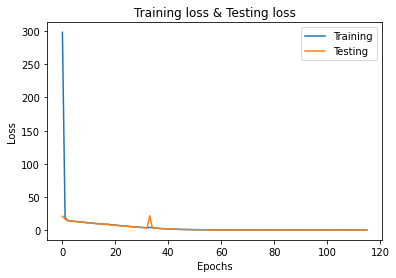

In [ ]:
# to visualize :
plt.plot(trained_model2.history["loss"], label = "Training")  # training loss = loss (error)
plt.plot(trained_model2.history["val_loss"], label = "Testing") # testing loss = val_loss (error)
plt.title("Training loss & Testing loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

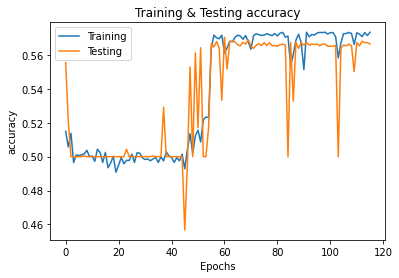

In [ ]:
# to visualize :
plt.plot(trained_model2.history["accuracy"], label = "Training")  # training loss = loss (error)
plt.plot(trained_model2.history["val_accuracy"], label = "Testing") # testing loss = val_loss (error)
plt.title("Training & Testing accuracy")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [ ]:
# To predict the output :
y_predict2 = model1.predict(x_test1)
y_predict2 = np.where(y_predict2 >= 0.5, 1,0)
y_predict2

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
# to print classification_report and confusion_matrix :
print("classification_report")
print(classification_report(y_test1, y_predict2))
print("Confusion_matrix")
print(confusion_matrix(y_test1, y_predict2))

classification_report
              precision    recall  f1-score   support

           0       0.60      0.39      0.47      2373
           1       0.55      0.74      0.63      2373

    accuracy                           0.57      4746
   macro avg       0.58      0.57      0.55      4746
weighted avg       0.58      0.57      0.55      4746

Confusion_matrix
[[ 928 1445]
 [ 613 1760]]


Observation : from the above model performing with the regularization of L2, the model ends to perform not that accurate and the accuracy is 57%. ANN selects the features automatically, but the model usually tends to be overfit. Thus after applying the regularization, along with EarlyStopping we have gained the accuracy of 57% only.

# **Conclusion :**

1. After performing ANN we have reached to the conclusion that the data is highly unbalanced. 

2. Though after overcoming the unbalacning sitaution and performing the model, we have gained the accuracy of 57%. 

3. The data accuracy of the model is 57% and validaity of the data is required. 

In [ ]:
# to see the weights and bias of hidden layer 1 :
#model.layers[0].get_weights()

In [ ]:
# to show hidden layer 2 :
#model.layers[1].get_weights()

In [ ]:
# to show Hidden layer 3 :
#model.layers[2].get_weights()